In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("datasets/ssl.txt", sep = '|', header=None, names=['Timestamp', 'CPU_Usage_Percentage', 'CPU_Clock_Speed', 'CPU_Core_Counts', 'CPU_Temperature', 'RAM_Usage_Percentage', 'Disk_Usage', 'Disk_Read', 'Disk_Write_Speed', 'Power_Watts'])

dataset['CPU_Usage_Percentage'] = dataset['CPU_Usage_Percentage'].str.extract(r'(\d+\.\d+)').astype(float)
dataset['CPU_Core_Counts'] = dataset['CPU_Core_Counts'].str.extract(r'(\d+)').astype(int)
dataset['CPU_Temperature'] = dataset['CPU_Temperature'].str.extract(r'(\d+\.\d+)').astype(float)
dataset['RAM_Usage_Percentage'] = dataset['RAM_Usage_Percentage'].str.extract(r'(\d+\.\d+)').astype(float)
dataset['Disk_Usage'] = dataset['Disk_Usage'].str.extract(r'(\d+\.\d+)').astype(float)
dataset['Disk_Read'] = dataset['Disk_Read'].str.extract(r'(\d+\.\d+)').astype(float)
dataset['Disk_Write_Speed'] = dataset['Disk_Write_Speed'].str.extract(r'(\d+\.\d+)').astype(float)
dataset['Power_Watts'] = dataset['Power_Watts'].str.extract(r'(\d+\.\d+)').astype(float)
dataset['CPU_Clock_Speed'] = dataset['CPU_Clock_Speed'].str.extract(r'(\d+\.\d+)').astype(float)

dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'].str.strip())

dataset.to_csv('csv/Major_dataset.csv', index=False)
dataset.head()


,Timestamp,CPU_Usage_Percentage,CPU_Clock_Speed,CPU_Core_Counts,CPU_Temperature,RAM_Usage_Percentage,Disk_Usage,Disk_Read,Disk_Write_Speed,Power_Watts
0,2023-12-22 17:33:30,12.7,2600.0,24,90.0,9.896382,91.709955,0.0,0.0,118.387880
1,2023-12-22 17:33:31,12.7,2600.0,24,90.0,9.896390,91.709955,0.0,0.0,119.036255
2,2023-12-22 17:33:32,12.7,2600.0,24,90.0,9.896341,91.709955,0.0,0.0,118.413394
3,2023-12-22 17:33:33,12.7,2600.0,24,91.0,9.896292,91.709955,0.0,0.0,118.183840
4,2023-12-22 17:33:34,12.7,2600.0,24,91.0,9.896431,91.709955,0.0,0.0,118.497682


In [3]:
path = "csv/Major_dataset.csv"

df = pd.read_csv(path)
df.head()

,Timestamp,CPU_Usage_Percentage,CPU_Clock_Speed,CPU_Core_Counts,CPU_Temperature,RAM_Usage_Percentage,Disk_Usage,Disk_Read,Disk_Write_Speed,Power_Watts
0,2023-12-22 17:33:30,12.7,2600.0,24,90.0,9.896382,91.709955,0.0,0.0,118.387880
1,2023-12-22 17:33:31,12.7,2600.0,24,90.0,9.896390,91.709955,0.0,0.0,119.036255
2,2023-12-22 17:33:32,12.7,2600.0,24,90.0,9.896341,91.709955,0.0,0.0,118.413394
3,2023-12-22 17:33:33,12.7,2600.0,24,91.0,9.896292,91.709955,0.0,0.0,118.183840
4,2023-12-22 17:33:34,12.7,2600.0,24,91.0,9.896431,91.709955,0.0,0.0,118.497682


In [4]:
print(df.shape,"\n")
for i in df.keys():
  print(i)

(580125, 10) 

Timestamp
CPU_Usage_Percentage
CPU_Clock_Speed
CPU_Core_Counts
CPU_Temperature
RAM_Usage_Percentage
Disk_Usage
Disk_Read
Disk_Write_Speed
Power_Watts


In [5]:
df.isnull().sum()

Timestamp               0
CPU_Usage_Percentage    0
CPU_Clock_Speed         0
CPU_Core_Counts         0
CPU_Temperature         0
RAM_Usage_Percentage    0
Disk_Usage              0
Disk_Read               0
Disk_Write_Speed        0
Power_Watts             0
dtype: int64

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df2= df.copy()
# Assuming df is your DataFrame
df_copy = df.drop(columns=['Timestamp']).copy()

# Normalize your data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_copy)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2)  # choose the number of clusters
kmeans_clusters = kmeans.fit_predict(df_scaled)


# Add the cluster assignments to your DataFrame
df_copy['kmeans_class'] = kmeans_clusters
df2['kmeans_class'] = kmeans_clusters

df2.to_csv('csv/WithClass.csv', index=False)

/home/superusr/.conda/envs/power/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


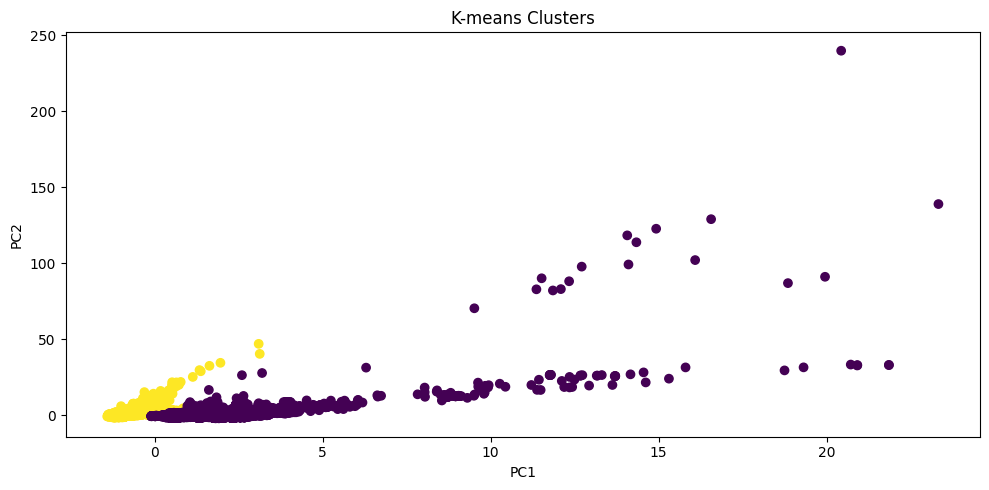

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce your data to 2 dimensions using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results and the cluster assignments
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['kmeans_class'] = kmeans_clusters

# Plot the clusters
plt.figure(figsize=(10,5))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['kmeans_class'])
plt.title('K-means Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()


In [8]:
df = pd.read_csv('csv/WithClass.csv')

# Filter the DataFrame 
df_filtered = df[df['kmeans_class'] == 0]
df_filtered.to_csv('csv/Class0.csv', index=False) # Class 0 is wake 

# Filter the DataFrame
df_filtered = df[df['kmeans_class'] == 1]
df_filtered.to_csv('csv/Class1.csv', index=False) # Class 1 is sleep

In [9]:
for i in df.keys():
    print(i)

Timestamp
CPU_Usage_Percentage
CPU_Clock_Speed
CPU_Core_Counts
CPU_Temperature
RAM_Usage_Percentage
Disk_Usage
Disk_Read
Disk_Write_Speed
Power_Watts
kmeans_class


In [51]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 'Timestamp' is the index
df.index = pd.to_datetime(df['Timestamp'])

train_size = int(len(df) * 0.71)
train, test = df[0:train_size], df[train_size:len(df)]

# Define the ARIMA model
model = ARIMA(train['kmeans_class'], order=(5,1,0))

# Fit the model
model_fit = model.fit()

/home/superusr/.conda/envs/power/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/superusr/.conda/envs/power/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/superusr/.conda/envs/power/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [97]:
forecast = model_fit.forecast(steps=7200) # in steps time in seconds 

/home/superusr/.conda/envs/power/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/superusr/.conda/envs/power/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [98]:
for f,i,e in zip(test['Timestamp'], test['kmeans_class'],forecast):
    if(i!=int(e)):
        print(f"{f}\t{i}:{int(e)}")

In [99]:
test['Timestamp'][0]

/tmp/ipykernel_30071/2460916583.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  test['Timestamp'][0]


'2023-12-27 13:24:37'

In [100]:
values = forecast.value_counts().to_dict()
values

{0.0: 7200}

In [101]:
if len(values)==1:
    if int(forecast.iloc[1])==0:
        print("wake")
    else :
        print("sleep")
else:
    ft = forecast.tolist()
    prev_state = 1.0
    for i in range(len(ft)):
        if ft[i] == 0.0:
            if prev_state != 0.0:
                if 0.0 in ft[i+1:i+1801]:
                    print("wake")
                elif 0.0 in ft[i+1:i+7201]:
                    print("Hibernate")
                else:
                    print("sleep")
            prev_state = 0.0
        else:
            prev_state = 1.0

wake
